# Garimpagem de Dados

## Aula 4 - Exercício de Classificação com kNN

Aluno : Joel Oliveira Ribeiro ~ 371822

In [1]:
# Importando todas as bibliotecas para uso

%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
import math 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn import preprocessing

#### Atualizando a função de classificação para medir na forma distância euclidiana para o pacote do scikit-learn

In [2]:
def someKNeighborsClassifier(k):
    try:
        return KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    except (k<=1) and (k%2==0) : # Para o algorítmo o k deve ser maior que um e ímpar
        return ('Valor de k inválido, espera-se um k > 1 e ímpar')

#### Carregando o arquivo contendo o Banco de Dados requisitado

In [3]:
df = pd.read_csv("train.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


#### Selecionando e tratando a lista de features que deverão ser essências para a classificação 

In [4]:
# Retirando features que de cara não parecem ser essências para a classificação
df.drop(labels=['Name','Ticket','Cabin'], inplace=True, axis=1)

In [5]:
# Transformando as features categoricas ['Sex' e 'Embarked') em numéricas
df['Sex'] = pd.factorize(df['Sex'])[0]
df['Embarked'] = pd.factorize(df['Embarked'])[0]

# Tratando a feature 'Age' por conter valores do tipo NaN, substituindo pelo valor médio de todas as idades
for i in range(len(df['Age'])):
    if(math.isnan(df['Age'][i])):
        df['Age'][i] = 0

for i in range(len(df['Age'])):
    if(df['Age'][i]==0):
        df['Age'][i] = df['Age'].median()

/Users/joelribeiro/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/joelribeiro/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [6]:
#Matriz de Correlação
corr = df.loc[:,'Pclass':].corr()
print(corr)

            Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
Pclass    1.000000 -0.131900 -0.356187  0.083081  0.018443 -0.549500  0.050992
Sex      -0.131900  1.000000 -0.073377  0.114631  0.245489  0.182333  0.111249
Age      -0.356187 -0.073377  1.000000 -0.232411 -0.155118  0.107554 -0.053111
SibSp     0.083081  0.114631 -0.232411  1.000000  0.414838  0.159651 -0.058008
Parch     0.018443  0.245489 -0.155118  0.414838  1.000000  0.216225 -0.076625
Fare     -0.549500  0.182333  0.107554  0.159651  0.216225  1.000000  0.058462
Embarked  0.050992  0.111249 -0.053111 -0.058008 -0.076625  0.058462  1.000000


#### Separando o dataset em treino (75%) / teste (25%) 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(normalize(df.loc[:,'Pclass':],norm='max'), df['Survived'], test_size=0.25)

#### Executando o classificador para 30 k's pulando de 4 em 4 e apresente todas as acurácias utilizando o dataset de validação (Qual o melhor k?) [plotar um gráfico com os resultados]

In [15]:
results = []

for k in range(5,120,4):
    neigh = someKNeighborsClassifier(k)
    neigh.fit(X_train, y_train)
    
    results.append([neigh.score(X_test,y_test),k])

In [16]:
print(results)

[[0.70403587443946192, 5], [0.71300448430493268, 9], [0.70403587443946192, 13], [0.70403587443946192, 17], [0.71748878923766812, 21], [0.68161434977578472, 25], [0.66367713004484308, 29], [0.6547085201793722, 33], [0.64573991031390132, 37], [0.65022421524663676, 41], [0.64573991031390132, 45], [0.64125560538116588, 49], [0.65022421524663676, 53], [0.65022421524663676, 57], [0.6547085201793722, 61], [0.6547085201793722, 65], [0.6547085201793722, 69], [0.6547085201793722, 73], [0.65022421524663676, 77], [0.65022421524663676, 81], [0.6547085201793722, 85], [0.65022421524663676, 89], [0.6547085201793722, 93], [0.65022421524663676, 97], [0.65022421524663676, 101], [0.65022421524663676, 105], [0.65022421524663676, 109], [0.65022421524663676, 113], [0.65022421524663676, 117]]


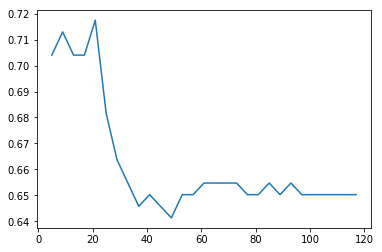

In [17]:
results = np.asarray(results)
plt.plot(results[:,1],results[:,0])
plt.show()

In [21]:
for i in range(len(results)):
    if(results[i,0]==max(results[:,0])):
        max_Accuracie,max_k = [results[i,0],results[i,1]]

print(max_Accuracie,max_k)


0.717488789238 21.0


#### Executando o classificador para o melhor k encontrado utilizando o dataset de teste e apresentar um relatório da precisão 

In [ ]:
### ainda implementando ...